<a href="https://colab.research.google.com/github/pa0lai/MachineLearning/blob/main/%E5%88%86%E9%A1%9Eclassification%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

environment settings

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score

import time
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

# 視覺化混淆矩陣
def plot_cf_matrix(y_test, y_pred, target_names):
    cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    df_matrix_df = pd.DataFrame(cf_matrix,index = target_names, columns = target_names)
    sns.heatmap(df_matrix_df, annot=True, cmap='RdYlBu', linewidth=.5, fmt='g', cbar=False)
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Data Preprocessing

In [ ]:

# step1: 讀取 & 整理資料
from google.colab import files
files.upload_file('abc.csv')
df = pd.read_csv('abc.csv')

print('Size of weather data frame is :',df.shape)

df.head()

Saved weatherAUS.csv to /content/abc.csv
Size of weather data frame is : (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.count().sort_values()
#檢查是否有過多缺失值

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [ ]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape
#移除過多缺失值的列，同時把日期和地點移除
df = df.dropna(how='any')
df.shape

(112925, 17)

In [ ]:
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

#使用Z分數移除離群值

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.117567  0.108221  0.206661       0.241214      0.577742   
1       0.841802  0.206845  0.276405       0.241214      1.339742   
2       0.037620  0.292772  0.276405       0.391345      0.457900   
3       0.553991  0.622159  0.276405       1.260094      0.500842   
4       0.773137  1.237969  0.160165       0.016018      0.980214   
...          ...       ...       ...            ...           ...   
145454  1.465392  0.265754  0.276405       0.734636      0.021471   
145455  1.577319  0.036615  0.276405       0.734636      0.261157   
145456  1.449403  0.235487  0.276405       1.410225      0.261157   
145457  1.161592  0.464626  0.276405       0.284243      0.740528   
145458  0.777844  0.478947  0.276405       0.959832      0.261157   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.524408     0.190140     1.380413     1.382962     1.142455   
1           0.29131

In [ ]:
#使用label encoding表示會不會下雨
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#用one hot encoding表達風向
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# 合併
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#用MinMaxScaler標準化資料
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Features engineering

In [ ]:
#用SelectKBest去獲得最高相關的特徵
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [ ]:
X = df[['Humidity3pm','Rainfall','RainToday']]
y = df[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Model


SVM


In [ ]:
from sklearn.svm import SVC

# Training a classifier
svm_clf = SVC(C=0.5, kernel='linear')
svm_clf.fit(X_train, y_train.values.ravel())

SVC(C=0.5, kernel='linear')

In [ ]:
# 對train、test 資料進行預測
clf_train_pred = svm_clf.predict(X_train)
clf_test_pred = svm_clf.predict(X_test)

評估結果

In [ ]:
print(classification_report(y_true=y_train, y_pred=clf_train_pred,target_names = ['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.84      0.98      0.90     59761
         Yes       0.75      0.27      0.40     15746

    accuracy                           0.83     75507
   macro avg       0.79      0.62      0.65     75507
weighted avg       0.82      0.83      0.80     75507



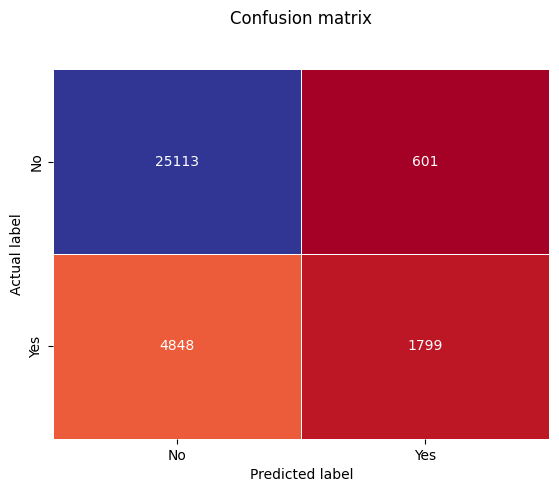

In [ ]:
plot_cf_matrix(y_test, clf_test_pred,target_names = ['No', 'Yes'])

Plotting decision regions

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [ ]:
X_train.shape

(75507, 3)

In [ ]:
def plot_decision_regions_(clf, x, y, fearure_use, features_name, value = 1.5, width=0.75):

    # Plotting decision regions
    plot_decision_regions(x, y, clf=clf, legend=2,
                                        feature_index=fearure_use,  #these one will be plotted
                                        filler_feature_values={i:value for i in range(len(features_name)) if i not in fearure_use},
                                        filler_feature_ranges={i:width for i in range(len(features_name)) if i not in fearure_use}
                        )

    # Adding axes annotations
    plt.xlabel(features_name[fearure_use[0]])
    plt.ylabel(features_name[fearure_use[1]])
    plt.title('SVM on weather')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


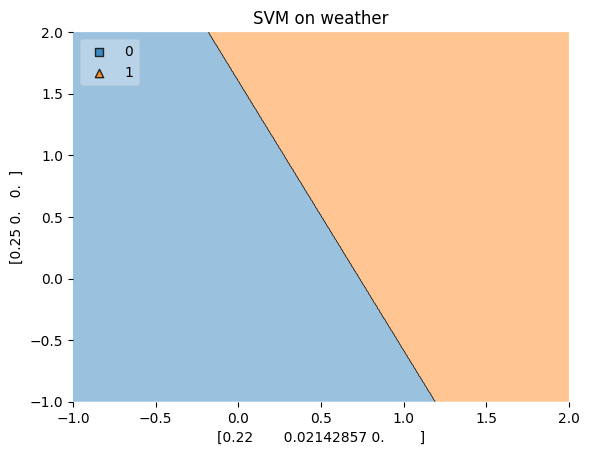

In [ ]:
x = X.to_numpy()
x_train = X_train.to_numpy()
Y_train = y_train.to_numpy()
Y_train = Y_train.flatten()
plot_decision_regions_(
    svm_clf, x_train, Y_train.astype(np.int_),
    fearure_use=[0,1],
    features_name=x[0:3],
    value =3.5, width=2
    )